In [1]:
import mne
import h5py
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import os
from tools import * # stuff from this project
from ridge import * # ridge pkg
from utils import * # utils from ridge
%matplotlib inline

## Load data

In [2]:
user = 'garret'
if user == 'maansi':
    data_dir = '/Users/maansidesai/Box/hamilton_lab_data/trailers_timit' #change this path
elif user == 'garret':
    data_dir = '/home/kfsh/data/trailers_timit'

subject='MT0002'
stimulus_class = 'TIMIT'

#load stim and resp 
resp_dict, stim_dict = loadEEGh5(subject, stimulus_class, data_dir,
          eeg_epochs=True, resp_mean = True, binarymat=False, binaryfeatmat = True, envelope=False, pitch=False, gabor_pc10=False, 
          spectrogram=False, binned_pitches=False, spectrogram_scaled=False, scene_cut=False)


TIMIT
['fadg0_si1279.wav', 'faem0_si2022.wav', 'falr0_si1955.wav', 'fbcg1_si1612.wav', 'fbjl0_si2182.wav', 'fbmh0_si1766.wav', 'fbmj0_si815.wav', 'fcag0_si1503.wav', 'fcag0_si1641.wav', 'fcaj0_si1479.wav', 'fcaj0_si1804.wav', 'fceg0_si1878.wav', 'fceg0_si618.wav', 'fcft0_si1808.wav', 'fcft0_si548.wav', 'fcjs0_si1607.wav', 'fcmh0_si2084.wav', 'fcmh1_si1493.wav', 'fcmr0_si1735.wav', 'fcmr0_si475.wav', 'fcrh0_si1718.wav', 'fcrz0_si2053.wav', 'fdas1_si2091.wav', 'fdaw0_si1406.wav', 'fdfb0_si1948.wav', 'fdhc0_si2189.wav', 'fdjh0_si1565.wav', 'fdml0_si2075.wav', 'fdms0_si1218.wav', 'fdrd1_si1544.wav', 'fdrw0_si1423.wav', 'fdxw0_si1511.wav', 'fdxw0_si2141.wav', 'feac0_si1245.wav', 'fear0_si1882.wav', 'fedw0_si1653.wav', 'fetb0_si1148.wav', 'fgcs0_si856.wav', 'fgjd0_si1179.wav', 'fgmd0_si2107.wav', 'fgrw0_si1990.wav', 'fhlm0_si1560.wav', 'fisb0_si2209.wav', 'fjas0_si2030.wav', 'fjhk0_si1652.wav', 'fjkl0_si1562.wav', 'fjkl0_si2192.wav', 'fjlg0_si1506.wav', 'fjlg0_si2306.wav', 'fjlr0_si1861.wav'

(64, 323)
mbpm0_si1577.wav
phnfeatmat shape is:
(14, 253)
taking the mean across repeats
(64, 253)
mbth0_si757.wav
phnfeatmat shape is:
(14, 271)
taking the mean across repeats
(64, 271)
mbwm0_si1934.wav
phnfeatmat shape is:
(14, 141)
taking the mean across repeats
(64, 141)
mbwp0_si1531.wav
phnfeatmat shape is:
(14, 203)
taking the mean across repeats
(64, 203)
mcal0_si508.wav
phnfeatmat shape is:
(14, 227)
taking the mean across repeats
(64, 227)
mccs0_si2099.wav
phnfeatmat shape is:
(14, 330)
taking the mean across repeats
(64, 330)
mcdc0_si1922.wav
phnfeatmat shape is:
(14, 307)
taking the mean across repeats
(64, 307)
mchh0_si1634.wav
phnfeatmat shape is:
(14, 323)
taking the mean across repeats
(64, 323)
mclk0_si1660.wav
phnfeatmat shape is:
(14, 216)
taking the mean across repeats
(64, 216)
mcmb0_si1898.wav
phnfeatmat shape is:
(14, 216)
taking the mean across repeats
(64, 216)
mcrc0_si1092.wav
phnfeatmat shape is:
(14, 223)
taking the mean across repeats
(64, 223)
mcth0_si1839.

(64, 211)
mkch0_si2008.wav
phnfeatmat shape is:
(14, 203)
taking the mean across repeats
(64, 203)
mkcl0_si1721.wav
phnfeatmat shape is:
(14, 213)
taking the mean across repeats
(64, 213)
mkdb0_si588.wav
phnfeatmat shape is:
(14, 296)
taking the mean across repeats
(64, 296)
mkjl0_si470.wav
phnfeatmat shape is:
(14, 219)
taking the mean across repeats
(64, 219)
mklr0_si1689.wav
phnfeatmat shape is:
(14, 272)
taking the mean across repeats
(64, 272)
mklr0_si2319.wav
phnfeatmat shape is:
(14, 221)
taking the mean across repeats
(64, 221)
mkls0_si1533.wav
phnfeatmat shape is:
(14, 248)
taking the mean across repeats
(64, 248)
mklt0_si1213.wav
phnfeatmat shape is:
(14, 318)
taking the mean across repeats
(64, 318)
mklt0_si583.wav
phnfeatmat shape is:
(14, 294)
taking the mean across repeats
(64, 294)
mklw0_si1844.wav
phnfeatmat shape is:
(14, 198)
taking the mean across repeats
(64, 198)
mkxl0_si1185.wav
phnfeatmat shape is:
(14, 319)
taking the mean across repeats
(64, 319)
mljc0_si1855.w

(64, 290)
mwre0_si2317.wav
phnfeatmat shape is:
(14, 303)
taking the mean across repeats
(64, 303)
mwrp0_si1525.wav
phnfeatmat shape is:
(14, 319)
taking the mean across repeats
(64, 319)
mzmb0_si1796.wav
phnfeatmat shape is:
(14, 246)
taking the mean across repeats
(64, 246)


In [3]:
#load weights from encoding model - from training set (370 sentences)
# Feats x delays x chans
# These weights do not include the test set!
f = h5py.File('%s/%s_STRF_by_phnfeat_%s.hf5' %(data_dir, subject, stimulus_class))
weights = f['wts_%s' %(stimulus_class.lower())][:]
print(weights.shape)
reshaped_wts = weights.reshape(-1,14,weights.shape[1])
print(reshaped_wts.shape)

(1078, 64)
(77, 14, 64)


/home/kfsh/anaconda3/envs/mne/lib/python3.7/site-packages/ipykernel_launcher.py:4: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  after removing the cwd from sys.path.


In [4]:
# Get resp set (10 timit sentences)
test_set = ['fcaj0_si1479.wav', 'fcaj0_si1804.wav', 'fdfb0_si1948.wav', 
    'fdxw0_si2141.wav', 'fisb0_si2209.wav', 'mbbr0_si2315.wav', 
    'mdlc2_si2244.wav', 'mdls0_si998.wav', 'mjdh0_si1984.wav', 
    'mjmm0_si625.wav']
vResp = np.hstack([resp_dict[r][0] for r in test_set]).T
print(vResp.shape) # timepoints x chans

(2134, 64)


In [5]:
# Make delays
delay_min, delay_max = 0.,0.6
wt_pad = 0.
fs = 128.
delays = np.arange(np.floor((delay_min-wt_pad)*fs),np.ceil((delay_max+wt_pad)*fs),dtype=np.int)
print(delays.shape)

(77,)


In [6]:
#get vStim
vStim_temp = np.atleast_2d(np.vstack([np.vstack(stim_dict[r]).T for r in test_set]))
vStim_temp = vStim_temp/vStim_temp.max(0)
vStim = make_delayed(vStim_temp, delays)
print(vStim.shape)

(2134, 1078)


## Predict the response
Given the `weights` from our training set of 370 sentences, we are going to predict the response to the test stimulus `vStim` (10 held out sentences). We will then compare this to the actual response (`vResp`) and calculate the correlation coefficient.

In [7]:
# Predict the response
corr, pred = predict_response(weights, vStim, vResp)

Calculating prediction...
Calculating correlation


In [8]:
# 1D corr for each elec
print(corr.shape)
# 2D: delays*feats x elecs
print(pred.shape)

(64,)
(2134, 64)


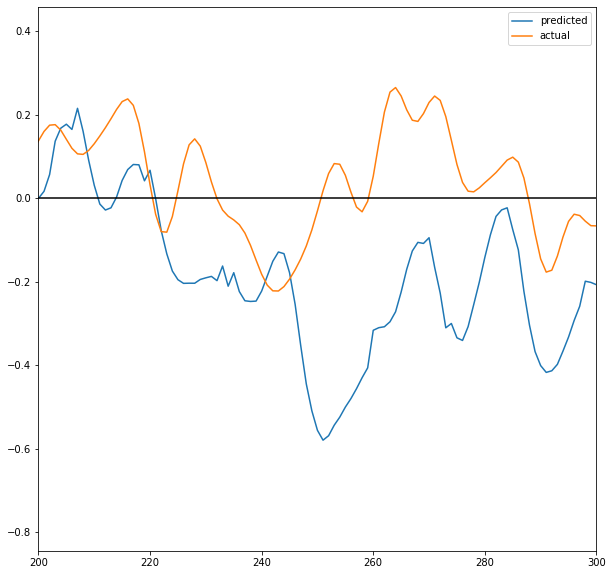

In [9]:
# Plot predicted and actual EEG to the test set
fig = plt.figure(figsize=(10,10))
plt.plot(pred.mean(1)/pred.max(),label='predicted');
plt.plot(vResp.mean(1)/vResp.max(),label='actual');
plt.axhline(0,color='k')
plt.gca().set_xlim([200,300])
plt.legend();

## Classification
???

#### one potential idea for classification: template classification
make template EEG responses which are the average across multiple repeats of the same sentence.

Then, find a single trial from fcaj0_si1479 (for example), and try to figure out which average it came from.  So we don't cheat, we have to make sure that this particular trial is not used to calculate the average for the actual template.  We then take the correlation of the single trial fcaj0_si1479 with every single average response, and find which correlation is highest to guess which stimulus they heard.

In [10]:
# dummy code for template classification
subj = 'TD0009'

clean_stims = ['1','3', '5', '7', '9', '11', '13', '15', '17', '19']
noisy_stims = ['2','4', '6', '8', '10', '12', '14', '16', '18', '20']

#noisy_stims = ['1', '3', '5', '7', '9', '11', '13', '15', '17', '19']
#clean_stims = ['0', '2', '4', '6', '8', '10', '12', '14', '16', '18']

# This is a matrix that stores the mean ERP across all repeats and across
# all EEG channels for each sentence (here clean only)
print(all_epochs[subj].get_data().shape[2])
templates = np.zeros((len(clean_stims), all_epochs[subj].get_data().shape[2]))
for idx, i in enumerate(clean_stims):
    print(idx, i)
    templates[idx,:] = all_epochs[subj][i].get_data().mean(0).mean(0)

NameError: name 'all_epochs' is not defined

In [ ]:
# Corr_matrix will store all of the correlations between single trials and the mean
# templates for each sentence.  For each EEG single trial, we want to find
# which sentence it belongs to
corr_matrix = dict()
templates_orig = templates.copy()

plt.figure(figsize=(12,4))

# Loop through all of the event_ids corresponding to clean sentences (no noise)
for ni, n in enumerate(clean_stims):
    # Get a matrix of all the trials0 only average across EEG channels but not trials yet!
    single_trials = all_epochs[subj][n].get_data().mean(1) # Mean across 64 channels
    nreps, ntimes = single_trials.shape
    
    # Initialize a correlation matrix for this stimulus
    corr_matrix[n] = np.zeros((nreps, len(clean_stims)))
    
    # Loop through every single trial of this stimulus
    for r in np.arange(nreps):
        for t in np.arange(templates.shape[0]):
            # If this trial includes the trial of interest, remove from the mean before getting corr
            #print(t, ni)
            if t==ni: 
                trial_mask = np.ones((nreps,), dtype=np.bool)
                trial_mask[r] = False
                #print(trial_mask)
                # This is the template but with a single trial left out so we're not cheating
                templates[t,:] = all_epochs[subj][n].get_data()[trial_mask,:,:].mean(0).mean(0)
                
            # Calculate the correlation between the single trial EEG and each of the template stimuli
            corr_matrix[n][r,t] = np.corrcoef(single_trials[r,:], templates[t,:])[0,1]
            
            # Set the templates back to their original version so we're not constantly removing data
            templates = templates_orig.copy()
            
    plt.subplot(2,5,ni+1)
    plt.imshow(corr_matrix[n], vmin=-0.5, vmax=0.5, aspect='auto')
    plt.xlabel('Predicted sentence #')
    plt.ylabel('Trial number')
    plt.title('Actual sent: %d , ev id %s'%(ni, n))
plt.tight_layout()

In [ ]:
# Calculate the confusion matrix so we see how often we would predict the correct sentence
# based on the single trial data
confusion_matrix = np.zeros((templates.shape[0], templates.shape[0]))
for ni, n in enumerate(clean_stims):
    hist, bin_edges= np.histogram(corr_matrix[n].argmax(1), bins=np.arange(0,templates.shape[0]+1))
    confusion_matrix[ni,:] = hist/np.sum(hist)
    
# Calculate the confusion matrix so we see how often we would predict the correct sentence
# based on the single trial data
noisy_confusion_matrix = np.zeros((templates.shape[0], templates.shape[0]))
for ni, n in enumerate(noisy_stims):
    hist, bin_edges= np.histogram(noisy_corr_matrix[n].argmax(1), bins=np.arange(0,templates.shape[0]+1))
    noisy_confusion_matrix[ni,:] = hist/np.sum(hist)

In [ ]:
unique_wavs = np.unique(wav_names)
clean_stimuli = [unique_wavs[np.int(i)-1] for i in clean_stims]

plt.figure(1)
plt.imshow(confusion_matrix, vmin=0, vmax=1.0, cmap=cm.Reds)
plt.ylabel('actual')
plt.xlabel('predicted')
plt.gca().set_xticks(np.arange(confusion_matrix.shape[0]))
plt.gca().set_yticks(np.arange(confusion_matrix.shape[0]))
plt.gca().set_xticklabels(clean_stimuli, rotation=90)
plt.gca().set_yticklabels(clean_stimuli)
plt.title('Decode clean')
plt.colorbar()
plt.savefig('/Users/maansidesai/Box/Grants:Fellowships/F31_NIH_2019/Figures/TD0009_clean_classifier.pdf')

plt.figure(2)
plt.imshow(noisy_confusion_matrix, vmin=0, vmax=1.0, cmap=cm.Reds)
plt.ylabel('actual')
plt.xlabel('predicted')
plt.gca().set_xticks(np.arange(confusion_matrix.shape[0]))
plt.gca().set_yticks(np.arange(confusion_matrix.shape[0]))
plt.gca().set_xticklabels(clean_stimuli, rotation=90)
plt.gca().set_yticklabels(clean_stimuli)
plt.title('Decode noisy')
plt.colorbar()
# plt.savefig('/Users/maansidesai/Box/Grants:Fellowships/F31_NIH_2019/Figures/TD0009_clean_classifier.pdf')

In [ ]:
plt.figure()
plt.bar(np.arange(templates.shape[0]), np.diag(confusion_matrix)*100)
plt.axhline(1/templates.shape[0]*100, label='chance', color='k', linestyle='--')
plt.xlabel('Sentence')
plt.ylabel('Accuracy (percent)')
plt.gca().set_xticks(np.arange(confusion_matrix.shape[0]))
plt.gca().set_xticklabels(clean_stimuli, rotation=90)
plt.legend()
plt.title('Classifying clear speech')

plt.savefig('/Users/maansidesai/Box/Grants:Fellowships/F31_NIH_2019/Figures/TD0009_clean_classifier_barchart.pdf')

plt.figure()
plt.bar(np.arange(templates.shape[0]), np.diag(noisy_confusion_matrix)*100)
plt.axhline(1/templates.shape[0]*100, label='chance', color='k', linestyle='--')
plt.xlabel('Sentence')
plt.ylabel('Accuracy (percent)')
plt.title('Classifying noisy speech')
plt.gca().set_xticks(np.arange(confusion_matrix.shape[0]))
plt.gca().set_xticklabels(clean_stimuli, rotation=90)
plt.legend()
